## Import the libraries that we will make use of it 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Loading the data 

In [3]:
df = pd.read_csv("Cars Data1.csv")

In [4]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [5]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


## Printing some info 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


## Print every unique value in Make 

In [53]:
df["Make"].value_counts().head()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Name: Make, dtype: int64

In [68]:
df["Make"].value_counts().tail()

Land Rover    3
Isuzu         2
Scion         2
MINI          2
Hummer        1
Name: Make, dtype: int64

## We had seen that the first five cars sale is as we see in the above but the first one is Toyota and the less one is Hummer. 

## Model Feature 

In [65]:
df["Model"].value_counts()

428

## Find the value of each origin

In [73]:
df['Origin'].value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

<AxesSubplot:xlabel='Origin', ylabel='count'>

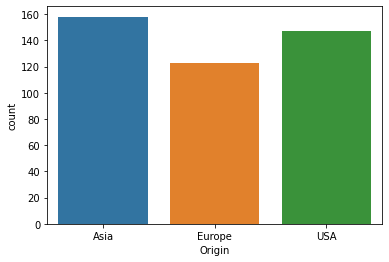

In [72]:
sns.countplot(x="Origin", data=df)

## We see that the most common origin of productions is Asia and then USA. the least one is Europe 

In [74]:
df.groupby('Make').describe().transpose()

Make                   Acura        Audi         BMW       Buick    Cadillac  \
EngineSize count    7.000000   19.000000   20.000000    9.000000    8.000000   
           mean     3.042857    3.057895    3.125000    3.722222    4.737500   
           std      0.602376    0.850696    0.701783    0.307318    0.686477   
           min      2.000000    1.800000    2.500000    3.100000    3.600000   
           25%      2.800000    2.850000    2.500000    3.800000    4.600000   
...                      ...         ...         ...         ...         ...   
Length     min    172.000000  159.000000  161.000000  187.000000  178.000000   
           25%    178.500000  179.000000  176.000000  195.000000  193.750000   
           50%    186.000000  180.000000  177.000000  196.000000  200.000000   
           75%    193.000000  192.000000  185.750000  200.000000  207.000000   
           max    197.000000  204.000000  204.000000  207.000000  221.000000   

Make               Chevrolet    Chrysler       Dodge        Ford        GMC  \
EngineSize count   27.000000   15.000000   13.000000   23.000000    8.00000   
           mean     3.733333    2.960000    3.484615    3.552174    4.65000   
           std      1.315002    0.522084    1.669754    1.319390    1.03923   
           min      1.600000    2.400000    2.000000    2.000000    2.80000   
           25%      2.650000    2.400000    2.400000    2.150000    4.27500   
...                      ...         ...         ...         ...        ...   
Length     min    153.000000  160.000000  174.000000  168.000000  190.00000   
           25%    183.000000  180.000000  189.000000  175.500000  197.25000   
           50%    190.000000  194.000000  193.000000  190.000000  208.00000   
           75%    199.000000  200.000000  204.000000  208.500000  219.75000   
           max    238.000000  208.000000  219.000000  227.000000  230.00000   

Make              ...     Pontiac     Porsche        Saab      Saturn   Scion  \
EngineSize count  ...   11.000000    7.000000    7.000000    8.000000    2.00   
           mean   ...    3.427273    3.542857    2.128571    2.300000    1.50   
           std    ...    1.117221    0.541163    0.160357    0.282843    0.00   
           min    ...    1.800000    2.700000    2.000000    2.200000    1.50   
           25%    ...    2.800000    3.400000    2.000000    2.200000    1.50   
...               ...         ...         ...         ...         ...     ...   
Length     min    ...  172.000000  170.000000  182.000000  181.000000  154.00   
           25%    ...  182.000000  172.500000  182.500000  185.000000  154.25   
           50%    ...  187.000000  175.000000  183.000000  185.000000  154.50   
           75%    ...  198.000000  175.000000  190.000000  186.250000  154.75   
           max    ...  203.000000  188.000000  190.000000  190.000000  155.00   

Make                  Subaru      Suzuki      Toyota  Volkswagen       Volvo  
EngineSize count   11.000000    8.000000   28.000000   15.000000   12.000000  
           mean     2.545455    2.325000    2.682143    2.806667    2.458333  
           std      0.269680    0.243487    0.938894    1.252692    0.339675  
           min      2.000000    2.000000    1.500000    1.800000    1.900000  
           25%      2.500000    2.225000    1.800000    1.850000    2.300000  
...                      ...         ...         ...         ...         ...  
Length     min    174.000000  163.000000  153.000000  161.000000  178.000000  
           25%    174.500000  170.000000  174.000000  170.000000  180.000000  
           50%    184.000000  174.000000  189.000000  184.000000  186.000000  
           75%    184.000000  179.500000  193.000000  185.000000  189.250000  
           max    193.000000  188.000000  218.000000  204.000000  190.000000  

[64 rows x 38 columns]

In [75]:
df.groupby('Model').describe().transpose()

Model             3.5 RL 4dr  3.5 RL w/Navigation 4dr  300M 4dr  \
EngineSize count         1.0                      1.0       1.0   
           mean          3.5                      3.5       3.5   
           std           NaN                      NaN       NaN   
           min           3.5                      3.5       3.5   
           25%           3.5                      3.5       3.5   
...                      ...                      ...       ...   
Length     min         197.0                    197.0     198.0   
           25%         197.0                    197.0     198.0   
           50%         197.0                    197.0     198.0   
           75%         197.0                    197.0     198.0   
           max         197.0                    197.0     198.0   

Model             300M Special Edition 4dr  325Ci 2dr  325Ci convertible 2dr  \
EngineSize count                       1.0        1.0                    1.0   
           mean                        3.5        2.5                    2.5   
           std                         NaN        NaN                    NaN   
           min                         3.5        2.5                    2.5   
           25%                         3.5        2.5                    2.5   
...                                    ...        ...                    ...   
Length     min                       198.0      177.0                  177.0   
           25%                       198.0      177.0                  177.0   
           50%                       198.0      177.0                  177.0   
           75%                       198.0      177.0                  177.0   
           max                       198.0      177.0                  177.0   

Model             325i 4dr  325xi 4dr  325xi Sport  330Ci 2dr  ...  \
EngineSize count       1.0        1.0          1.0        1.0  ...   
           mean        2.5        2.5          2.5        3.0  ...   
           std         NaN        NaN          NaN        NaN  ...   
           min         2.5        2.5          2.5        3.0  ...   
           25%         2.5        2.5          2.5        3.0  ...   
...                    ...        ...          ...        ...  ...   
Length     min       176.0      176.0        176.0      176.0  ...   
           25%       176.0      176.0        176.0      176.0  ...   
           50%       176.0      176.0        176.0      176.0  ...   
           75%       176.0      176.0        176.0      176.0  ...   
           max       176.0      176.0        176.0      176.0  ...   

Model             Yukon 1500 SLE  Yukon XL 2500 SLT  Z4 convertible 2.5i 2dr  \
EngineSize count             1.0                1.0                      1.0   
           mean              4.8                6.0                      2.5   
           std               NaN                NaN                      NaN   
           min               4.8                6.0                      2.5   
           25%               4.8                6.0                      2.5   
...                          ...                ...                      ...   
Length     min             199.0              219.0                    161.0   
           25%             199.0              219.0                    161.0   
           50%             199.0              219.0                    161.0   
           75%             199.0              219.0                    161.0   
           max             199.0              219.0                    161.0   

Model             Z4 convertible 3.0i 2dr  lon2 4dr  lon2 quad coupe 2dr  \
EngineSize count                      1.0       1.0                  1.0   
           mean                       3.0       2.2                  2.2   
           std                        NaN       NaN                  NaN   
           min                        3.0       2.2                  2.2   
           25%                        3.0       2.2 

## Using visualization to describe the most type of DriveTrain being produced 

<AxesSubplot:xlabel='DriveTrain', ylabel='count'>

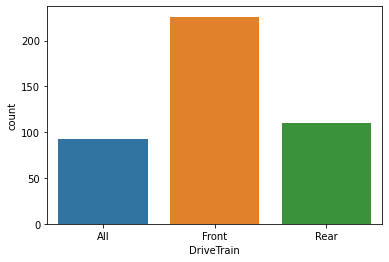

In [88]:
sns.countplot(x= 'DriveTrain', data = df)

## we concluded that the most common type used is the front drive train then the rear. 

## MSRP and Invoice relation 

<AxesSubplot:xlabel='MSRP', ylabel='Invoice'>

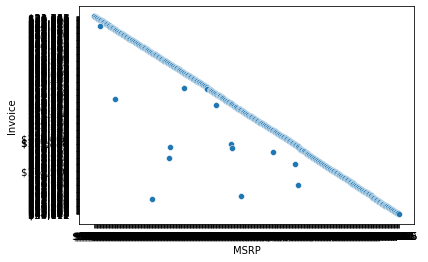

In [75]:
sns.scatterplot(data=df, x="MSRP", y="Invoice")

## we had found that ther is a negative strong correlation when the MSRP increse the Invoice decrease. 

## using visualization to describe the most type that produced 

<AxesSubplot:xlabel='Type', ylabel='count'>

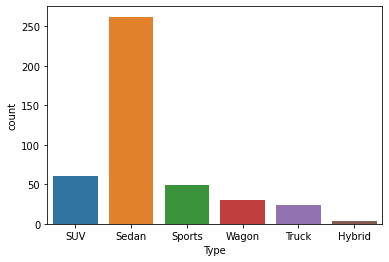

In [115]:
sns.countplot(x= 'Type', data = df)

## We had seen that the sedan most used then SUV. 

## Here we use visualizations to see every origin and what is the percenatge of each type that produce 

<AxesSubplot:xlabel='Type', ylabel='count'>

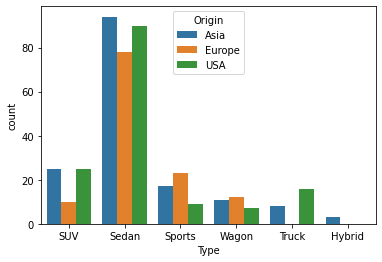

In [77]:
sns.countplot(x= 'Type', hue='Origin', data = df)

## From our visualizations we see that the sedan is the most type of productions in all of origin, and in Asia specifically, Hybrid type is produced in Asia only,  type of truck produced in Asia and USA only, sports type produced most in Europe and the SUV is equal in productions for Asia and USA.

## Here we make visualizations to describe every Origin and what is the percentage of every in produce DriveTrain 

<AxesSubplot:xlabel='Origin', ylabel='count'>

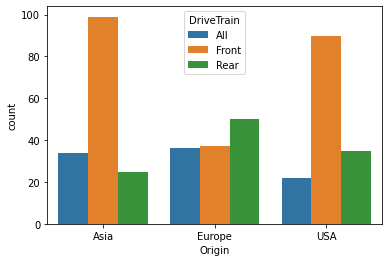

In [119]:
sns.countplot(x='Origin', hue = 'DriveTrain', data = df)

## We see that the most common drivetrain used is the front in both of Asia and USA, but not in Europe rear is used most  

##  We use a visualization to see a relation between the horse power and the weight 

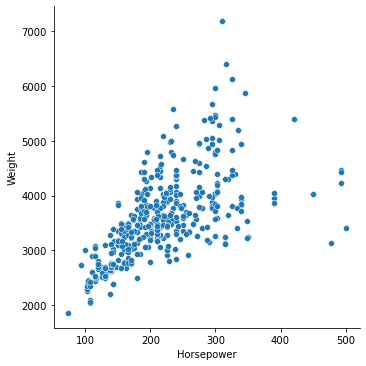

In [151]:
sns.relplot(x="Horsepower", y="Weight", data=df)

## There is a positive correlation between horse and weight but ther is some outliers we will deal with them. 

## we use visualization to see a relation between a Wheelbase and weight 

<AxesSubplot:xlabel='Wheelbase', ylabel='Weight'>

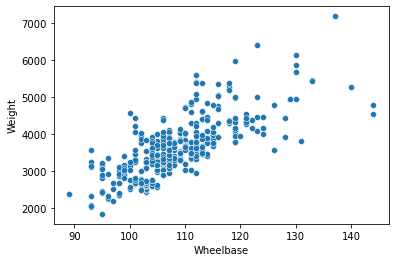

In [78]:
sns.scatterplot(x="Wheelbase", y="Weight", data=df)

## There is a posotive correlation between them .

## We see a visualization to see relation between a cylinders and horsepower 

In [80]:
df["Cylinders"].value_counts()

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

<AxesSubplot:xlabel='Cylinders', ylabel='count'>

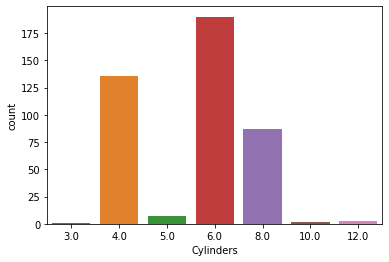

In [81]:
sns.countplot(x="Cylinders", data=df)

## We see that the most common size of cylinder used is 6,4,8.  

## This is a realtion between a horse power and enginesize 

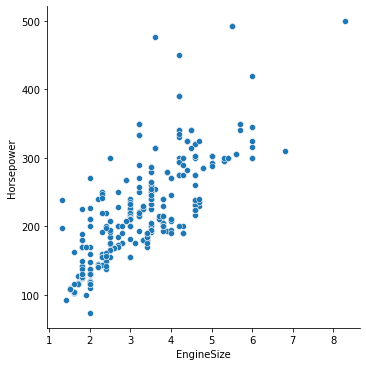

In [133]:
sns.relplot(x="EngineSize", y="Horsepower", data=df)

In [138]:
df.corr()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


## using visualization to see the max horse power in a car 

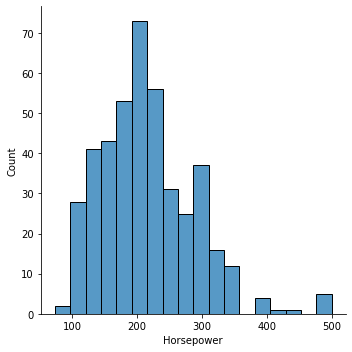

In [142]:
sns.displot(df['Horsepower'])

## Coorlation Between  MPG_City and MPG_Highway

<AxesSubplot:xlabel='MPG_City', ylabel='MPG_Highway'>

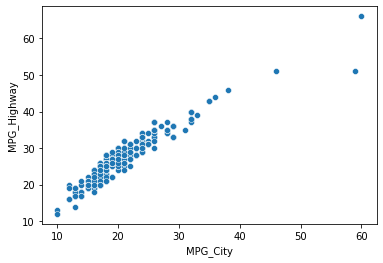

In [84]:
sns.scatterplot(x='MPG_City', y= 'MPG_Highway', data =df)

## There is a strong correlation between both of them 